(18231, 2304)
(18231,)
Test accuracy: 0.5043878894251865
              precision    recall  f1-score   support

           0       0.48      0.42      0.45      1526
           1       0.57      0.59      0.58      1528
           2       0.46      0.50      0.48      1504

    accuracy                           0.50      4558
   macro avg       0.50      0.50      0.50      4558
weighted avg       0.50      0.50      0.50      4558



/home/patrickpragman/PycharmProjects/smile_tracker/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


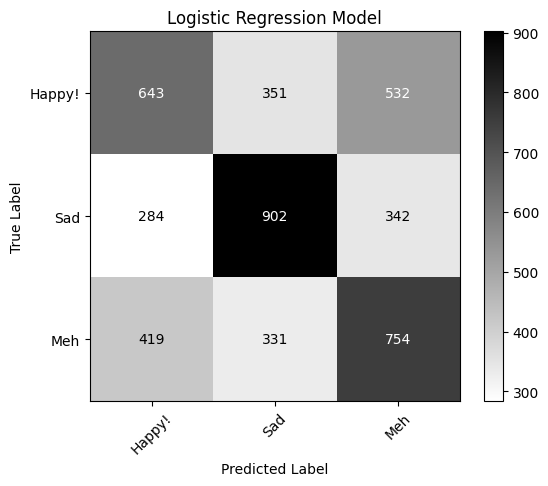

In [1]:
# let's do logistic regression... I'll be kind of non-plussed if this ends up being better
from sklearn.linear_model import LogisticRegression
from skimage import color, io
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import os
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import numpy as np
import matplotlib.pyplot as plt

classifier = LogisticRegression()
data_path = "./balanced_set_2"
data = []
Y = []
def one_hot(s):
    if s.upper() == "HAPPY":
        return 1
    elif s.upper() == "SAD":
        return 2
    else:
        return 0

for root, dirs, files in os.walk(data_path):
  for file in files:
    if ".JPEG" in file.upper() or ".JPG" in file.upper() or ".PNG" in file.upper():
      key = root.split("/")[-1]
      img = io.imread(f"{root}/{file}", as_gray=True)
      img = resize(img, (48, 48))
      arr = np.asarray(img).reshape(48*48, )
      data.append(arr)

      Y.append(one_hot(key))  # simple one hot encoding

y = np.array(Y)
X = np.array(data)

# now we've loaded all the X values into a single array
# and all the Y values into another one, let's do a train test split

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42  # for consistency
                                                    )

# fit the model with data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluate the model on the test set
print('Test accuracy:', accuracy_score(y_test, y_pred))

# confusion

# Evaluation
print(classification_report(y_test, y_pred))
confusion_mtx = confusion_matrix(y_test, y_pred)

plt.imshow(confusion_mtx, cmap='binary', interpolation='nearest')
plt.colorbar()

tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Happy!', "Sad", "Meh"], rotation=45)
plt.yticks(tick_marks, ['Happy!', 'Sad', "Meh"])

thresh = confusion_mtx.max() / 2.
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        plt.text(j, i, format(confusion_mtx[i, j]), ha="center", va="center", color="white" if confusion_mtx[i, j] > thresh else "black")

plt.title('Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

with open("logistic_regression_2.pkl", "wb") as file:
  pickle.dump(classifier, file)